# Regressions on the whole features

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy import ma

In [44]:
df = pd.read_csv('OnlineNewsPopularity.csv')
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

datax = dfx.as_matrix(columns=None)
datay = dfy.as_matrix(columns=None)

In [52]:
datax_cov = np.cov(datax,rowvar=False)
data_eigvals, data_eigvecs = np.linalg.eig(datax_cov)

matrix_A = data_eigvecs[:,:10]
#matrix_A = np.transpose(matrix_A)
data_PCA = np.dot(datax,matrix_A)
datax = data_PCA

In [53]:
temp = np.ones((datax.shape[0],datax.shape[1]+1))
temp[:,:-1] = datax
datax = temp

trainX = datax[:int(datax.shape[0]*3/4),:]
trainY = datay[:int(datay.shape[0]*3/4)]

testX = datax[int(datax.shape[0]*3/4):,:]
testY = datay[int(datay.shape[0]*3/4):]

### LASSO regrssion

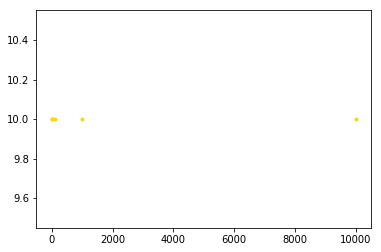

In [62]:
myprams = [1, 10, 100, 1000, 10000]
nonzeros = np.zeros((5,2))
testerrors = np.zeros((5,2))
j =0
minnonz = 500
minloss = 500
wl_b = 0
wl_d = 0
for i in myprams:
    clf = linear_model.Lasso(alpha=i)
    clf.fit(trainX,trainY)
    nonzeros[j,0] = i
    nonzeros[j,1] = LA.norm(clf.coef_,0)
    y_pre = np.dot(testX,clf.coef_)
    testerrors[j,0] = i
    testerrors[j,1] = mean_squared_error(testY, y_pre)
    if LA.norm(clf.coef_,0)!=0:
        if LA.norm(clf.coef_,0)<minnonz:
            minnonz = LA.norm(clf.coef_,0)
            wl_b = i
        if mean_squared_error(testY, y_pre)<minloss:
            minloss = mean_squared_error(testY, y_pre)
            wl_d = i
    plt.plot(i,LA.norm(clf.coef_,0),'ro',c='gold',markersize = 3)
    j+=1
plt.show()

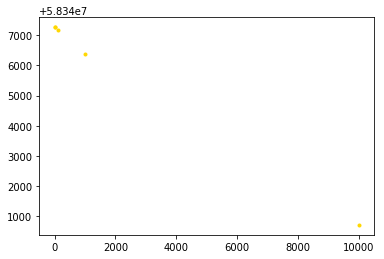

In [63]:
plt.plot(testerrors[:,0],testerrors[:,1],'ro',c='gold',markersize = 3)
plt.show()

In [64]:
testerrors

array([[  1.00000000e+00,   5.83472649e+07],
       [  1.00000000e+01,   5.83472566e+07],
       [  1.00000000e+02,   5.83471742e+07],
       [  1.00000000e+03,   5.83463730e+07],
       [  1.00000000e+04,   5.83407111e+07]])

### Ridge regrssion

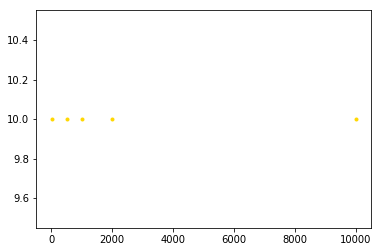

In [65]:
myprams = [10, 500, 1000, 2000, 10000]
nonzeros = np.zeros((5,2))
testerrors = np.zeros((5,2))
j =0
minnonz = 500
minloss = 500
wr_b = 0
wr_d = 0
for i in myprams:
    clf = linear_model.Ridge(alpha=i)
    clf.fit(trainX,trainY)
    nonzeros[j,0] = i
    nonzeros[j,1] = LA.norm(clf.coef_,0)
    y_pre = np.dot(testX,np.transpose(clf.coef_))
    testerrors[j,0] = i
    testerrors[j,1] = mean_squared_error(testY, y_pre)
    if LA.norm(clf.coef_,0)!=0:
        if LA.norm(clf.coef_,0)<minnonz:
            minnonz = LA.norm(clf.coef_,0)
            wr_b = i
        if mean_squared_error(testY, y_pre)<minloss:
            minloss = mean_squared_error(testY, y_pre)
            wr_d = i
    plt.plot(i,LA.norm(clf.coef_,0),'ro',c='gold',markersize = 3)
    j+=1
plt.show()

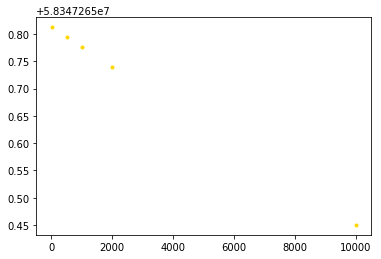

In [66]:
plt.plot(testerrors[:,0],testerrors[:,1],'ro',c='gold',markersize = 3)
plt.show()

In [67]:
testerrors

array([[  1.00000000e+01,   5.83472658e+07],
       [  5.00000000e+02,   5.83472658e+07],
       [  1.00000000e+03,   5.83472658e+07],
       [  2.00000000e+03,   5.83472657e+07],
       [  1.00000000e+04,   5.83472655e+07]])